In [2]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        #creating empty arrays to add results to them
        labels = []
        images = []
        
        #skipping the first row as they are headers
        next(training_file)
        
        for row in csv_reader:
            #getting labels from each row and then appending them to labels array
            labels.append(row[0])
            #print((labels))
            
            #getting pixel values from each row and then appending them to images array
            pixel_values = np.array_split((row[1:]), 28)
            #print(type(pixel_values))
            #print(pixel_values.shape)
            images.append(pixel_values)
            #print(len(images))
            
    #converting all values to float
    images = np.array(images).astype('float')
    labels = np.array(labels).astype('float')    
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.1,
                                   horizontal_flip=False,
                                   fill_mode='nearest')

#create a generator with x_train as training_images and y_train as training_labels
train_gen = train_datagen.flow(training_images, training_labels, batch_size=32)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

#create a generator with x_train as validation_images and y_train as validation_labels
validation_gen = validation_datagen.flow(testing_images, testing_labels, batch_size=32)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    #first pair of convolution/pooling
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(28,28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #second pair of convolution/pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #flatten layer
    tf.keras.layers.Flatten(),
    
    #dropout layer
    tf.keras.layers.Dropout(0.2),
    
    #dense layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='sigmoid')
    
])

# Compile Model. 
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Train the Model
history = model.fit_generator(train_gen,
                             epochs=5,
                              validation_data=validation_gen)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/5
858/858 [==============================] - 103s 120ms/step - loss: 2.9957 - acc: 0.1021 - val_loss: 2.5809 - val_acc: 0.2387
Epoch 2/5
858/858 [==============================] - 109s 128ms/step - loss: 2.5353 - acc: 0.2225 - val_loss: 1.8927 - val_acc: 0.4013
Epoch 3/5
858/858 [==============================] - 102s 119ms/step - loss: 2.2116 - acc: 0.3149 - val_loss: 1.5842 - val_acc: 0.4817
Epoch 4/5
858/858 [==============================] - 99s 115ms/step - loss: 1.9593 - acc: 0.3837 - val_loss: 1.4195 - val_acc: 0.5318
Epoch 5/5
858/858 [==============================] - 98s 114ms/step - loss: 1.7865 - acc: 0.4373 - val_loss: 1.1295 - val_acc: 0.6146


[3.25809645652771, 0.0461517]

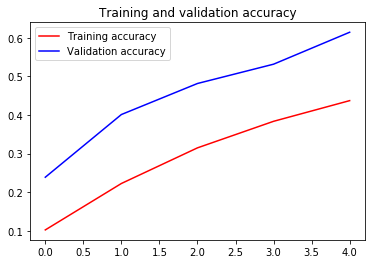

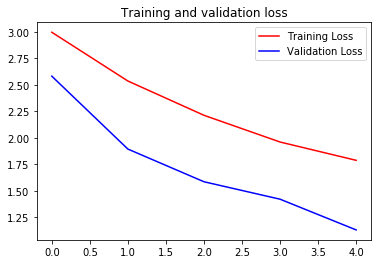

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [7]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [8]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

SyntaxError: invalid syntax (<ipython-input-8-6ef2368aec7d>, line 1)

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);